<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-MLP%20for%204%20class%20classifications%20based%20on%20WSNBFSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-MLP for 4 class classifications based on WSNBFSF**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load and preprocess data
dataset = pd.read_csv("dataset.csv")
y = dataset['Class']
X = dataset.drop(['Class'], axis=1)
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Oversample data to handle class imbalance
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [4]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Train MLP model
input_shape = X_train.shape[1]
num_classes = len(y.unique())
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

In [6]:
# Combine LR and MLP predictions
lr_mlp_pred = np.column_stack((lr_pred, mlp_pred))
combined_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=lr_mlp_pred)

Combined Model Results:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     52692
           1       0.59      0.81      0.69      2378
           2       0.75      0.94      0.83      1496
           3       0.99      0.97      0.98      5856

    accuracy                           0.96     62422
   macro avg       0.83      0.92      0.87     62422
weighted avg       0.97      0.96      0.97     62422



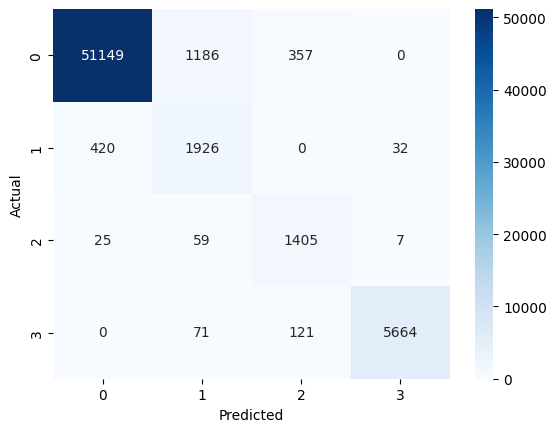

In [7]:
# Evaluate combined model
print("Combined Model Results:")
print(classification_report(y_test, combined_pred))
cm = confusion_matrix(y_test, combined_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()